In [1]:
from epynet import Network
import numpy as np
import pandas as pd
import math as m
import random

import sys
sys.path.insert(0, '../src/')
from network_grouping import *
from functions import *

from utils import *
from networkx import draw_networkx
import matplotlib.pyplot as plt
from operator import itemgetter, attrgetter

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from scipy.spatial import distance

In [2]:
#inp = "../input/simple_network.inp"
#inp = "../input/case1.inp"
inp = "../input/santaizabel.inp"
#inp = "../input/Andreazza - Outubro.inp"

emitters = [0.001]
n_zones = 20

In [3]:
y = setorization(inp, n_zones , emitters = emitters)

#for i in sorted(y, key=y.get, reverse=False):
#    print str(i) + " : " + str(y[i]+1)

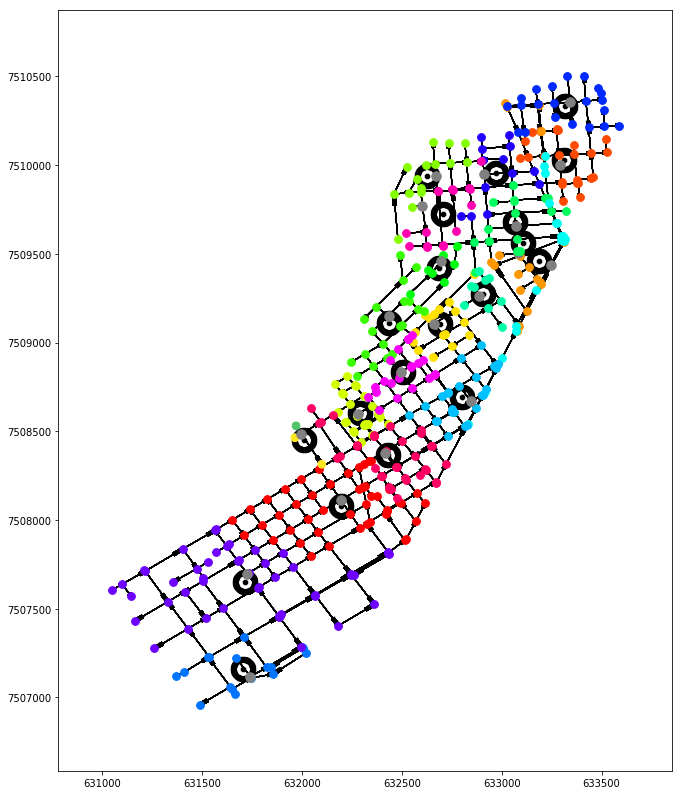

In [5]:
graph_zones(inp, y, n_zones)

Para o sensor: [u'599']
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0]


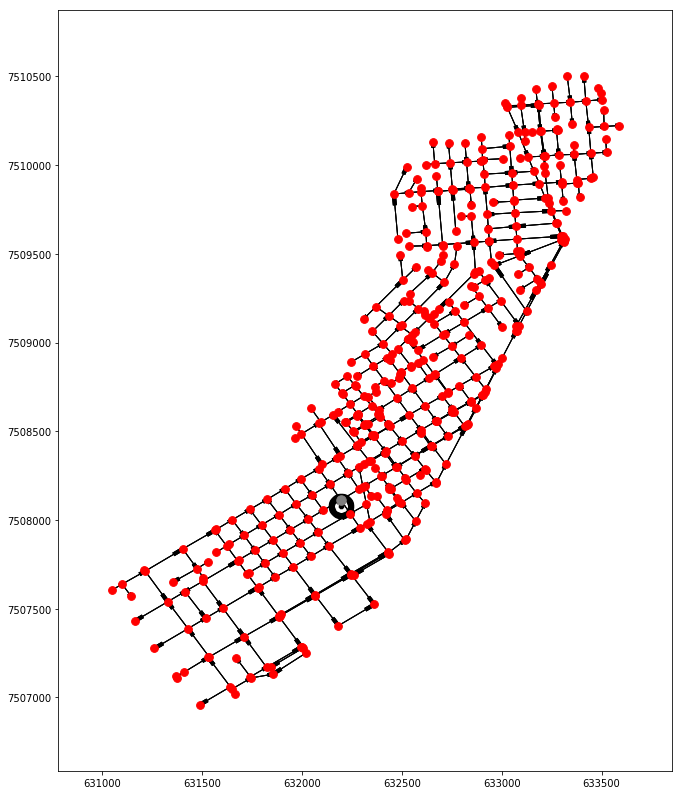

Para o sensor: [u'73']


In [ ]:
emitter = 0.1
coverage = []

for i_sensor in range(n_zones):
    sensor = nodes_next_center(inp, y, i_sensor)
    print "Para o sensor:", sensor
    count = []
    node_detected = []
    for i in range(n_zones):    
        node_list = [key for key in y.keys() if y[key] == i]
                       
        y_simulated = simulation(inp, sensorIds=sensor, nodeIds=node_list)
        y_simulated_leak = simulation(inp, emitter= emitter, sensorIds=sensor, nodeIds=node_list)

        y_dif = y_simulated - y_simulated_leak
        y_dif = y_dif[:,:,0]
       
        precision = [0.5]
        comparison = np.greater(y_dif, precision)
                              
        for j in range(len(node_list)):
            if comparison[j] == True:
                #print comparison[j], node_list[j]
                node_detected.append(node_list[j])
                
        #node_detected = [node_list[j] for j in range(len(node_list)) if comparison[j] == True]     
            
        count.append(np.count_nonzero(comparison)/float(len(comparison)))
    
    print count       
    coverage.append(sum(count)/float((n_zones)))
    print coverage
    
    net = inp_to_graph(inp)
    
    nodes_selected = []
    center = []
      
    nodes_selected = nodes_next_center(inp, y, i_sensor)
    center = center_zone(inp, y, i_sensor)
        
    draw_networkx(net, with_labels=False, pos=net.graph['COORDINATES'], node_size=60)
    
    draw_networkx(net, with_labels=False, pos=net.graph['COORDINATES'], node_size=90, nodelist = node_detected,
                    node_color = 'blue')

    draw_networkx(net, with_labels=False, pos=net.graph['COORDINATES'], node_size=90, nodelist = nodes_selected,  
                    node_color = 'gray') 
                 
    plt.scatter(center[:,0], center[:,1], marker="8", linewidths = 20, color= 'black')
      
    fig_size = [0,0]
    fig_size[0] = 11
    fig_size[1] = 14
    plt.rcParams["figure.figsize"] = fig_size
    #plt.legend( loc='lower left', fontsize=8)
    fig_size
    plt.savefig('teste123.png')

    plt.show()

In [13]:
print coverage,"\n"
print sum(coverage)/n_zones

[0.95, 0.3052631578947368, 0.95, 0.95, 0.95, 0.3052631578947368, 0.95, 0.95, 0.3052631578947368, 0.95, 0.95, 0.95, 0.20979520706154103, 0.3052631578947368, 0.3052631578947368, 0.95, 0.95, 0.95, 0.3052631578947368, 0.95] 

0.719568707721
